In [1]:
figdir = '/data/Phillippy/projects/HG002_Masseq/PDTG-project/scripts/isoseq-analysis/plts'

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
sqanti = "/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2309/isoquant_extended/hg002.chm13.flnc_extended_sqanti3_rescued_classification.txt"

In [4]:
tab = pd.read_csv(sqanti, sep = '\t' , header=0)

In [5]:
tab.head(3)

,isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,HHV4_unassigned_transcript_11,NC_007605.1,+,1803,19,full-splice_match,NaN,HHV4_unassigned_transcript_11,1803.0,19.0,...,TTGACACGCCTGTCATTCTA,NaN,False,NaN,False,AATAAA,-25.0,True,NaN,NaN
1,HHV4_unassigned_transcript_129,NC_007605.1,+,2150,4,full-splice_match,NaN,HHV4_unassigned_transcript_129,2150.0,4.0,...,ATTAAAATCTCTATGTCATT,NaN,False,NaN,False,AATAAA,-21.0,True,MAARVPIEELRELRHLRGHCREDVVGVQRSGRPLCLRPPRARDRAL...,NaN
2,HHV4_unassigned_transcript_135,NC_007605.1,+,2008,9,full-splice_match,NaN,HHV4_unassigned_transcript_135,2008.0,9.0,...,AAATGTGGTTTGTATGGCTA,NaN,False,NaN,False,AATAAA,-11.0,True,MFLACVLVLIVDAVLQLSPLLGAVTVVSMTLLLLAFVLWLSSPGGL...,NaN


In [6]:
tab.columns

Index(['isoform', 'chrom', 'strand', 'length', 'exons', 'structural_category',
       'associated_gene', 'associated_transcript', 'ref_length', 'ref_exons',
       'diff_to_TSS', 'diff_to_TTS', 'diff_to_gene_TSS', 'diff_to_gene_TTS',
       'subcategory', 'RTS_stage', 'all_canonical', 'min_sample_cov',
       'min_cov', 'min_cov_pos', 'sd_cov', 'FL', 'n_indels', 'n_indels_junc',
       'bite', 'iso_exp', 'gene_exp', 'ratio_exp', 'FSM_class', 'coding',
       'ORF_length', 'CDS_length', 'CDS_start', 'CDS_end', 'CDS_genomic_start',
       'CDS_genomic_end', 'predicted_NMD', 'perc_A_downstream_TTS',
       'seq_A_downstream_TTS', 'dist_to_CAGE_peak', 'within_CAGE_peak',
       'dist_to_polyA_site', 'within_polyA_site', 'polyA_motif', 'polyA_dist',
       'polyA_motif_found', 'ORF_seq', 'ratio_TSS'],
      dtype='object')

In [7]:
# Filter out transcripts with RTS 
tab = tab[tab['RTS_stage'] != True ]

In [9]:
tab.shape

(292905, 48)

In [10]:
tab.head(3)

,isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,HHV4_unassigned_transcript_11,NC_007605.1,+,1803,19,full-splice_match,NaN,HHV4_unassigned_transcript_11,1803.0,19.0,...,TTGACACGCCTGTCATTCTA,NaN,False,NaN,False,AATAAA,-25.0,True,NaN,NaN
1,HHV4_unassigned_transcript_129,NC_007605.1,+,2150,4,full-splice_match,NaN,HHV4_unassigned_transcript_129,2150.0,4.0,...,ATTAAAATCTCTATGTCATT,NaN,False,NaN,False,AATAAA,-21.0,True,MAARVPIEELRELRHLRGHCREDVVGVQRSGRPLCLRPPRARDRAL...,NaN
2,HHV4_unassigned_transcript_135,NC_007605.1,+,2008,9,full-splice_match,NaN,HHV4_unassigned_transcript_135,2008.0,9.0,...,AAATGTGGTTTGTATGGCTA,NaN,False,NaN,False,AATAAA,-11.0,True,MFLACVLVLIVDAVLQLSPLLGAVTVVSMTLLLLAFVLWLSSPGGL...,NaN


In [11]:
df = pd.DataFrame(tab.groupby(['structural_category'])['structural_category'].count())
df.columns = ['total_count']
for cat in ['polyA_motif_found','within_polyA_site','within_CAGE_peak'] :
    print(cat)
    df_tmp = pd.DataFrame(tab[tab[cat] == True].groupby(['structural_category'])[cat].count())
    df = df.merge(df_tmp, left_index= True, right_index= True)
    df[cat + '_perc'] = df[cat] / df['total_count'] * 100
df = df.reset_index()    

polyA_motif_found
within_polyA_site
within_CAGE_peak


In [12]:
df

,structural_category,total_count,polyA_motif_found,polyA_motif_found_perc,within_polyA_site,within_polyA_site_perc,within_CAGE_peak,within_CAGE_peak_perc
0,antisense,227,51,22.466960,41,18.061674,36,15.859031
1,full-splice_match,276465,93127,33.684915,240448,86.972311,227607,82.327600
2,genic,65,20,30.769231,23,35.384615,30,46.153846
3,incomplete-splice_match,5154,1005,19.499418,2562,49.708964,3174,61.583236
4,intergenic,191,39,20.418848,19,9.947644,21,10.994764
5,novel_in_catalog,5244,2405,45.861937,4395,83.810069,3770,71.891686
6,novel_not_in_catalog,5559,1818,32.703724,3331,59.920849,3156,56.772801


In [18]:
nameDic = {'antisense' :'antisense',
           'full-splice_match' :'FSM',
           'genic' :'genic',
           'incomplete-splice_match' :'ISM',
           'intergenic' :'intergenic',
           'novel_in_catalog' :'NIC',
           'novel_not_in_catalog' :'NNC'}

In [19]:
my_list = [nameDic[item] if item in nameDic else item for item in df['structural_category'].to_list()]

In [22]:
df['structural_category'] = my_list

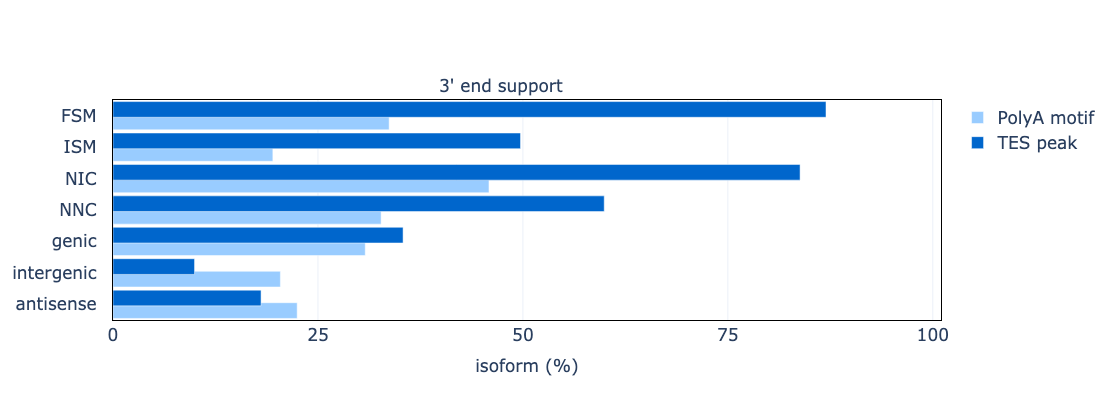

In [153]:
import plotly.graph_objects as go

fig_TES = go.Figure(data=[
    go.Bar(name='PolyA motif', x=list(df['polyA_motif_found_perc']), y=list(df['structural_category']), orientation='h', marker_color = 'rgb(153,204,255)'),
    go.Bar(name='TES peak', x=list(df['within_polyA_site_perc']), y=list(df['structural_category']), orientation='h', marker_color = 'rgb(0,102,204)')
])
# Change the bar mode
fig_TES.update_layout(title=dict(text = "3' end support", font=dict(size=17), xanchor = 'center', yanchor = 'top', y = .8, x = .45),
                     yaxis = dict(tickfont = dict(size=17)),
                      xaxis = dict(tickfont = dict(size=17), title = dict(text = "isoform (%)", font = dict(size=17))),
                      legend = dict(font = dict(size=17)),
                      width = 500, height = 400,
                     template="plotly_white")

fig_TES.update_yaxes(ticksuffix = "  ")
fig_TES.update_traces(width=.5)
fig_TES.update_xaxes(range=[0, 101])
fig_TES.update_xaxes(tick0=25, dtick=25)
fig_TES.update_yaxes(categoryorder='array', categoryarray= ['antisense','intergenic','genic','NNC','NIC','NIC','ISM','FSM'])

fig_TES.update_xaxes(linewidth=1, linecolor='black', mirror=True, 
    showline=True)
fig_TES.update_yaxes(linewidth=1, linecolor='black', mirror=True, 
    showline=True)

fig_TES.show()

In [155]:
fig_TES.write_image(figdir + "/structure_polyA.extended.svg")

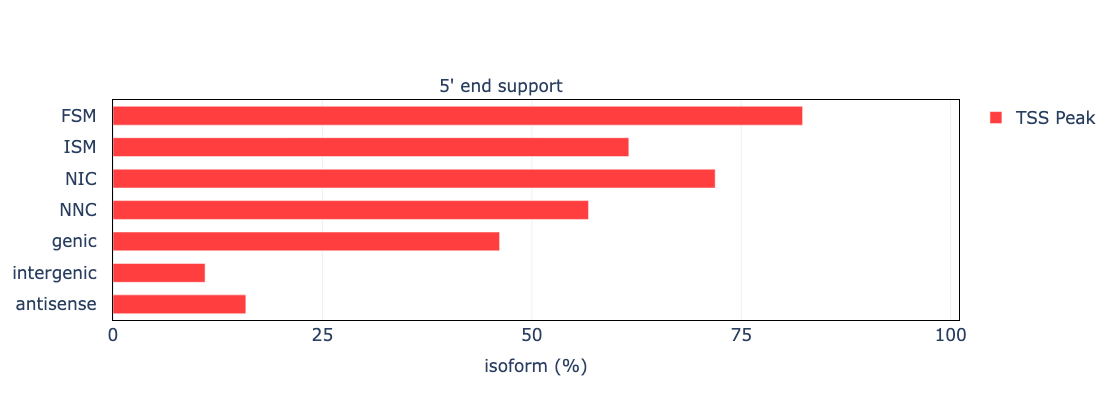

In [151]:
import plotly.graph_objects as go

fig_TSS = go.Figure(data=[
    go.Bar(name="5' end support",
           x=list(df['within_CAGE_peak_perc']), y=list(df['structural_category']), 
           orientation='h', marker_color = 'rgb(255,63,63)', 
          )])
# Change the bar mode
fig_TSS.update_layout(title=dict(text = "5' end support", font=dict(size=17), xanchor = 'center', yanchor = 'top', y = .8, x = .45),
                     yaxis = dict(tickfont = dict(size=17)),
                      xaxis = dict(tickfont = dict(size=17), title = dict(text = "isoform (%)", font = dict(size=17))),
                      legend = dict(font = dict(size=17)),
                      width = 500, height = 400,
                     template="plotly_white")

fig_TSS.update_yaxes(ticksuffix = "  ")
fig_TSS['data'][0]['showlegend'] = True
fig_TSS.update_traces(width=.6)
fig_TSS.update_yaxes(categoryorder='array', categoryarray= ['antisense','intergenic','genic','NNC','NIC','NIC','ISM','FSM'], title = None)
fig_TSS.update_xaxes(range=[0, 101])
# fig_TSS.update_xaxes(nticks=10)
fig_TSS.update_xaxes(tick0=25, dtick=25)


new = {"5' end support":'TSS Peak',}
fig_TSS.for_each_trace(lambda t: t.update(name = new[t.name]))

fig_TSS.update_xaxes(linewidth=1, linecolor='black', mirror=True, 
    showline=True)
fig_TSS.update_yaxes(linewidth=1, linecolor='black', mirror=True, 
    showline=True)

fig_TSS.show()

In [152]:
fig_TSS.write_image(figdir + "/structure_TSS.extended.svg")

In [69]:
tab["transcript_novelty"] = False

In [70]:
tab.loc[tab['associated_transcript'] == "novel","transcript_novelty"] = True

In [79]:
df = pd.DataFrame(tab.groupby(['structural_category'])['structural_category'].count())
df.columns = ['total_count']
for cat in ['transcript_novelty'] :
    print(cat)
    df_tmp = pd.DataFrame(tab[tab[cat] == True].groupby(['structural_category'])[cat].count())
    df = df.merge(df_tmp, left_index= True, right_index= True, how = 'left')
    df[cat + '_perc'] = df[cat] / df['total_count'] * 100
df = df.reset_index()

transcript_novelty


In [96]:
tab[tab['associated_gene'].notna()]

,isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,...,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS,transcript_novelty
1498,TCONS_00001636,chr1,+,168,3,intergenic,novelGene_224,novel,NaN,NaN,...,NaN,False,NaN,False,AATAAA,-20.0,True,NaN,NaN,True
4503,TCONS_00004825,chr1,+,136,2,intergenic,novelGene_712,novel,NaN,NaN,...,NaN,False,NaN,False,AATGAA,-18.0,True,NaN,NaN,True
4872,TCONS_00005221,chr1,+,193,3,antisense,novelGene__AS,novel,NaN,NaN,...,NaN,False,NaN,False,NaN,NaN,False,NaN,NaN,True
6741,TCONS_00007270,chr1,+,193,3,intergenic,novelGene_1082,novel,NaN,NaN,...,NaN,False,NaN,False,NaN,NaN,False,NaN,NaN,True
7580,TCONS_00008199,chr1,+,164,2,antisense,novelGene__AS,novel,NaN,NaN,...,NaN,False,NaN,False,NaN,NaN,False,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299545,transcript2689.chrX.nnic,chrX,+,1646,4,intergenic,novelGene_12943,novel,NaN,NaN,...,NaN,False,NaN,False,NaN,NaN,False,NaN,NaN,True
299563,transcript3316.chrX.nnic,chrX,+,1106,3,intergenic,novelGene_12944,novel,NaN,NaN,...,833.0,False,NaN,False,NaN,NaN,False,NaN,NaN,True
299567,transcript3539.chrX.nnic,chrX,+,1905,4,antisense,novelGene__AS,novel,NaN,NaN,...,473.0,False,NaN,False,NaN,NaN,False,NaN,NaN,True
299612,transcript6119.chrX.nnic,chrX,-,2899,3,intergenic,novelGene_12990,novel,NaN,NaN,...,NaN,False,-24.0,True,NaN,NaN,False,NaN,NaN,True


In [80]:
df

,structural_category,total_count,transcript_novelty,transcript_novelty_perc
0,antisense,227,227.0,100.0
1,full-splice_match,276465,NaN,NaN
2,genic,65,65.0,100.0
3,incomplete-splice_match,5154,NaN,NaN
4,intergenic,191,191.0,100.0
5,novel_in_catalog,5244,5244.0,100.0
6,novel_not_in_catalog,5559,5559.0,100.0
